# Preview of CSV Files

In this section, we will preview the first three rows of each CSV file located in the specified folder. This allows us to quickly inspect the contents of the datasets and understand their structure. The following steps will be taken for each CSV file:

1. **File Identification**: We will identify each CSV file in the folder and display its name.
2. **Data Preview**: We will read the CSV file and display the first three rows of data, providing a glimpse into the data structure and values.
3. **Separator**: A visual separator will be included for clarity between each file's output.

This analysis will help in assessing the data before further exploration or proessing.


In [13]:
import os
import pandas as pd

# Folder path
folder_path = r"C:\Users\User\Desktop\Said`s Python\Final Project\data"

# Loop through each file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):  # Check if the file is a CSV
        file_path = os.path.join(folder_path, filename)
        # Read the CSV file
        df = pd.read_csv(file_path)
        # Print the file name
        print(f"File: {filename}")
        # Print the first 3 rows
        print(df.head(3))
        print("\n" + "="*50 + "\n")  # Separator for clarity


File: assessments.csv
  code_module code_presentation  id_assessment assessment_type   date  weight
0         AAA             2013J           1752             TMA   19.0    10.0
1         AAA             2013J           1753             TMA   54.0    20.0
2         AAA             2013J           1754             TMA  117.0    20.0


File: courses.csv
  code_module code_presentation  module_presentation_length
0         AAA             2013J                         268
1         AAA             2014J                         269
2         BBB             2013J                         268


File: studentAssessment.csv
   id_assessment  id_student  date_submitted  is_banked  score
0           1752       11391              18          0   78.0
1           1752       28400              22          0   70.0
2           1752       31604              17          0   72.0


File: studentInfo.csv
  code_module code_presentation  id_student gender                region  \
0         AAA           

# Basic Statistics for CSV Files

In this section, we will analyze the basic statistics of each CSV file located in the specified folder. This includes examining data types, identifying missing values, and generating descriptive statistics for the datasets. The following steps are taken for each CSV file:

1. **Data Types**: We will display the data types for each column in the dataset to understand the nature of the data.
2. **Missing Values**: We will count the number of missing values for each column, helping to identify areas that may need further cleaning or imputation.
3. **Descriptive Statistics**: We will generate descriptive statistics for numerical and categorical columns, providing insights into the distribution and summary of the data.

The analysis will be performed for all CSV files present in the specified folder.


In [15]:
import os
import pandas as pd

# Folder path
folder_path = r"C:\Users\User\Desktop\Said`s Python\Final Project\data"

# Function to print basic statistics for each file
def print_statistics(file_path):
    df = pd.read_csv(file_path)
    
    print(f"Statistics for {os.path.basename(file_path)}")
    print("--------------------------------------------------")
    
    # Print data types
    print("Data types:")
    print(df.dtypes)
    
    # Print number of missing values per column
    print("\nMissing values per column:")
    print(df.isnull().sum())
    
    # Print basic statistics (numerical columns)
    print("\nDescriptive statistics:")
    print(df.describe(include='all'))
    
    print("\n" + "="*50 + "\n")

# Loop through each file in the folder and print statistics
for filename in os.listdir(folder_path):
    if filename.endswith('.csv'):  # Check if the file is a CSV
        file_path = os.path.join(folder_path, filename)
        print_statistics(file_path)


Statistics for assessments.csv
--------------------------------------------------
Data types:
code_module           object
code_presentation     object
id_assessment          int64
assessment_type       object
date                 float64
weight               float64
dtype: object

Missing values per column:
code_module           0
code_presentation     0
id_assessment         0
assessment_type       0
date                 11
weight                0
dtype: int64

Descriptive statistics:
       code_module code_presentation  id_assessment assessment_type  \
count          206               206     206.000000             206   
unique           7                 4            NaN               3   
top            FFF             2014J            NaN             TMA   
freq            52                57            NaN             106   
mean           NaN               NaN   26473.975728             NaN   
std            NaN               NaN   10098.625521             NaN   
min        

# Data Cleaning Process

In this section, we will perform data cleaning on multiple datasets related to student assessments and performance. The cleaning steps include handling missing values, converting data types, and ensuring data integrity across different columns. Below are the specific actions taken for each dataset:

1. **assessments.csv**: Filled missing dates with the mean date value.
2. **studentAssessment.csv**: Replaced missing scores with the mean score and fixed any negative values in the `date_submitted` column by taking their absolute values.
3. **studentInfo.csv**: Filled missing `imd_band` values with the mode, and converted categorical columns to the appropriate category type.
4. **studentRegistration.csv**: Handled missing registration dates and created a new column to categorize the timing of registration relative to the course start date.
5. **vle.csv**: Filled missing values in the `week_from` and `week_to` columns with their mean values.
6. **studentVle.csv**: Converted categorical columns to category type.

Finally, we will save the cleaned datasets to new CSV files for further analysis.


In [21]:
import pandas as pd
import numpy as np

# Loading datasets
assessments = pd.read_csv(r"C:\Users\User\Desktop\Said`s Python\Final Project\data\assessments.csv")
courses = pd.read_csv(r"C:\Users\User\Desktop\Said`s Python\Final Project\data\courses.csv")
studentAssessment = pd.read_csv(r"C:\Users\User\Desktop\Said`s Python\Final Project\data\studentAssessment.csv")
studentInfo = pd.read_csv(r"C:\Users\User\Desktop\Said`s Python\Final Project\data\studentInfo.csv")
studentRegistration = pd.read_csv(r"C:\Users\User\Desktop\Said`s Python\Final Project\data\studentRegistration.csv")
studentVle = pd.read_csv(r"C:\Users\User\Desktop\Said`s Python\Final Project\data\studentVle.csv")
vle = pd.read_csv(r"C:\Users\User\Desktop\Said`s Python\Final Project\data\vle.csv")

# 1. Clean assessments.csv
assessments['date'].fillna(assessments['date'].mean(), inplace=True)

# 2. Clean studentAssessment.csv
studentAssessment['score'].fillna(studentAssessment['score'].mean(), inplace=True)

# Fixing negative dates in 'date_submitted' (optional approach: take the absolute value)
studentAssessment['date_submitted'] = studentAssessment['date_submitted'].abs()

# 3. Clean studentInfo.csv
studentInfo['imd_band'].fillna(studentInfo['imd_band'].mode()[0], inplace=True)

# Converting categorical columns to category type
studentInfo['code_module'] = studentInfo['code_module'].astype('category')
studentInfo['code_presentation'] = studentInfo['code_presentation'].astype('category')
studentInfo['gender'] = studentInfo['gender'].astype('category')
studentInfo['region'] = studentInfo['region'].astype('category')
studentInfo['highest_education'] = studentInfo['highest_education'].astype('category')
studentInfo['imd_band'] = studentInfo['imd_band'].astype('category')
studentInfo['age_band'] = studentInfo['age_band'].astype('category')
studentInfo['disability'] = studentInfo['disability'].astype('category')
studentInfo['final_result'] = studentInfo['final_result'].astype('category')

# 4. Clean studentRegistration.csv
# Filling missing 'date_registration' with the mean
studentRegistration['date_registration'].fillna(studentRegistration['date_registration'].mean(), inplace=True)

# Create a new column to mark 'before' or 'after'
studentRegistration['registration_timing'] = studentRegistration['date_registration'].apply(lambda x: 'Before Start' if x < 0 else 'After Start')

# You can also convert negative values into descriptive text
studentRegistration['days_to_start'] = studentRegistration['date_registration'].apply(lambda x: f"{abs(x)} days {'before' if x < 0 else 'after'} the start")

# 5. Clean vle.csv
vle['week_from'].fillna(vle['week_from'].mean(), inplace=True)
vle['week_to'].fillna(vle['week_to'].mean(), inplace=True)

# 6. Clean studentVle.csv
studentVle['code_module'] = studentVle['code_module'].astype('category')
studentVle['code_presentation'] = studentVle['code_presentation'].astype('category')

# Save cleaned datasets
assessments.to_csv('cleaned_assessments.csv', index=False)
studentAssessment.to_csv('cleaned_studentAssessment.csv', index=False)
studentInfo.to_csv('cleaned_studentInfo.csv', index=False)
studentRegistration.to_csv('cleaned_studentRegistration.csv', index=False)
vle.to_csv('cleaned_vle.csv', index=False)
studentVle.to_csv('cleaned_studentVle.csv', index=False)

print("Cleaning completed.")


C:\Users\User\AppData\Local\Temp\ipykernel_13724\4082833617.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  assessments['date'].fillna(assessments['date'].mean(), inplace=True)
C:\Users\User\AppData\Local\Temp\ipykernel_13724\4082833617.py:17: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves

Cleaning completed.


# Loading and Merging Cleaned Datasets

In this section, we will load the cleaned datasets and perform a series of merges to create a comprehensive dataset for analysis. The steps involved are as follows:

1. **Load Cleaned Datasets**: We will load the cleaned CSV files, which contain essential information about student assessments, student information, registration details, and assessments themselves.

2. **Merge Datasets**: 
   - First, we will merge the `studentAssessment` dataset with the `studentInfo` dataset using the `id_student` key. This will allow us to combine assessment scores with corresponding student demographic information.
   - Next, we will merge the resulting dataset with the `studentRegistration` dataset to include registration details.
   - Finally, we will merge the combined dataset with the `assessments` dataset to incorporate information related to the assessments.

3. **Display Merged Data**: The first few rows of the merged dataset will be displayed to provide a preview of the combined data structure and values.

This process ensures that we have a well-rounded dataset, which is crucial for further analysis and vsualization.


In [91]:
import pandas as pd

# Load cleaned datasets
studentAssessment = pd.read_csv('cleaned_data\\cleaned_studentAssessment.csv')
studentInfo = pd.read_csv('cleaned_data\\cleaned_studentInfo.csv')
studentRegistration = pd.read_csv('cleaned_data\\cleaned_studentRegistration.csv')
assessments = pd.read_csv('cleaned_data\\cleaned_assessments.csv')  # Load assessments

# Merging studentAssessment with studentInfo on 'id_student'
merged_data = pd.merge(studentAssessment, studentInfo, on='id_student', how='left')

# Merging the result with studentRegistration on 'id_student'
merged_data = pd.merge(merged_data, studentRegistration, on='id_student', how='left')

# Merging with assessments on 'id_assessment'
merged_data = pd.merge(merged_data, assessments, on='id_assessment', how='left')

# Display the first few rows of the merged data
print(merged_data.head())


   id_assessment  id_student  date_submitted  is_banked  score code_module_x  \
0           1752       11391              18          0   78.0           AAA   
1           1752       28400              22          0   70.0           AAA   
2           1752       31604              17          0   72.0           AAA   
3           1752       32885              26          0   69.0           AAA   
4           1752       38053              19          0   79.0           AAA   

  code_presentation_x gender                region      highest_education  \
0               2013J      M   East Anglian Region       HE Qualification   
1               2013J      F              Scotland       HE Qualification   
2               2013J      F     South East Region  A Level or Equivalent   
3               2013J      F  West Midlands Region     Lower Than A Level   
4               2013J      M                 Wales  A Level or Equivalent   

   ... code_presentation_y date_registration  date_unreg

# Data Analysis Overview

In this section, we will explore various analyses to gain insights from the merged dataset. Each subsection focuses on a specific aspect of the data:

1. **Demographic Analysis**: This analysis will provide insights into the demographic characteristics of students, such as age, gender, and region, and how these factors relate to their performance.

2. **Assessment Performance Analysis**: We will examine the performance of students across different assessments, including average scores and distributions.

3. **Relationships Between Variables**: This section will explore how various variables in the dataset interact with each other, such as the relationship between studied credits and assessment scores.

4. **Trends Over Time**: We will analyze trends in student performance over time, identifying any patterns or shifts in scores based on submission dates.

5. **Correlation Analysis**: This analysis will focus on identifying correlations between different numerical variables in the dataset, highlighting any significant relationships.

6. **Visualization of Gender Distribution**: We will visualize the distribution of students by gender, providing a clearer picture of the demographic makeup.

7. **Comprehensive Analysis by Education and Assessment Type**: This section will delve deeper into the impact of education level and assessment type on student performance, offering a nuanced understanding of their interdependencies.

By conducting these analyses, we aim to draw meaningful insights that can inform decision-making and improve eduational outcomes.


## 1. Demographic Analysis
- Heatmap of Students by Region and Final Result
- Count of Students by Highest Education Level

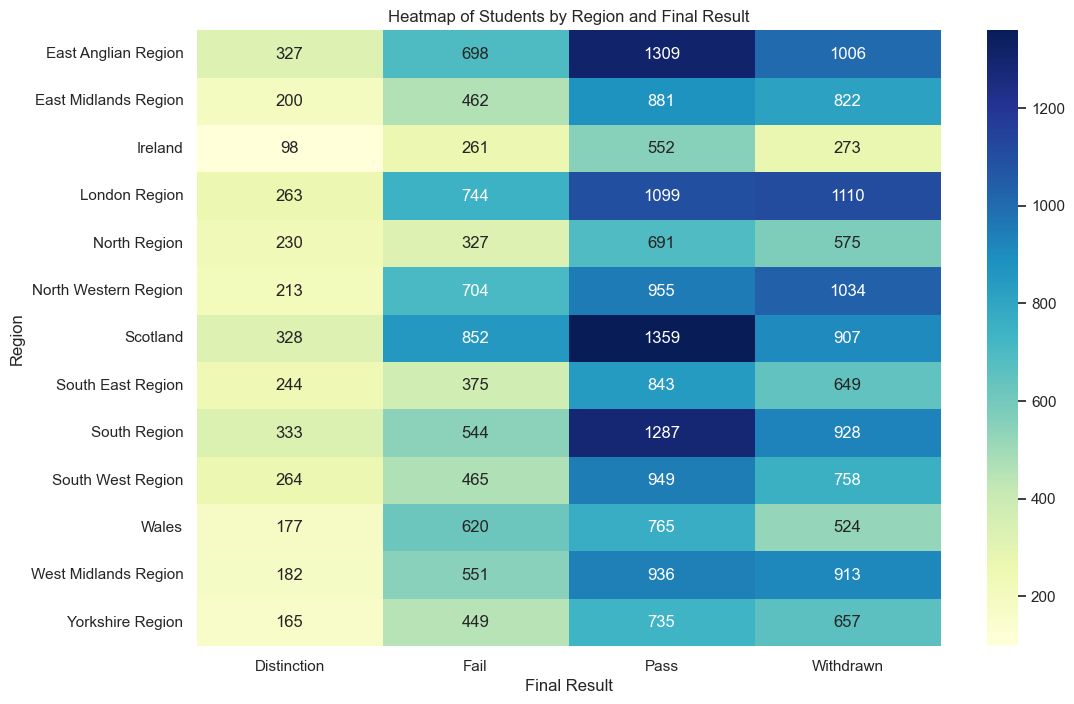

In [48]:
demographic_data = student_info.groupby(['region', 'final_result']).size().unstack()
plt.figure(figsize=(12, 8))
sns.heatmap(demographic_data, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of Students by Region and Final Result')
plt.xlabel('Final Result')
plt.ylabel('Region')
plt.show()


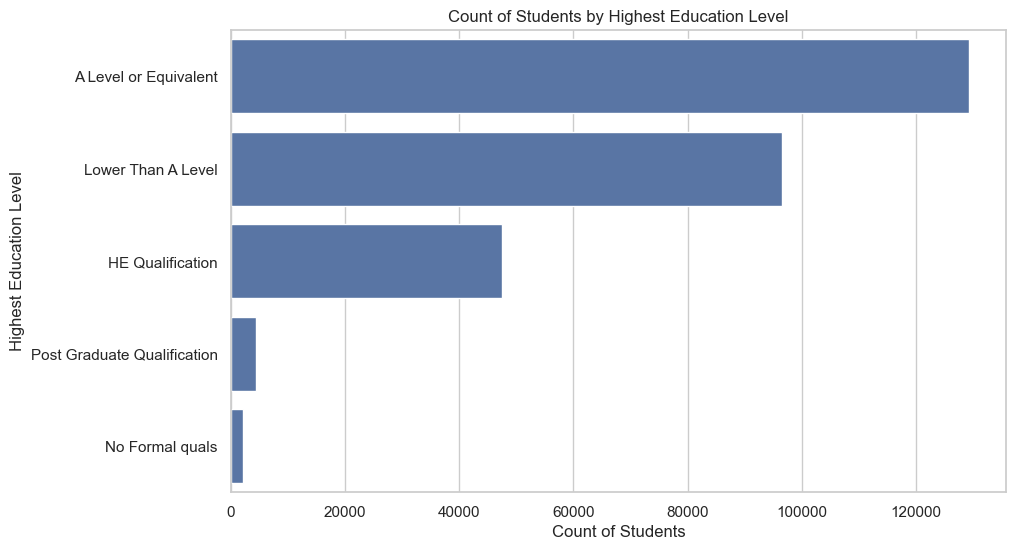

In [81]:
plt.figure(figsize=(10, 6))
sns.countplot(y='highest_education', data=merged_data, order=merged_data['highest_education'].value_counts().index)
plt.title('Count of Students by Highest Education Level')
plt.xlabel('Count of Students')
plt.ylabel('Highest Education Level')
plt.show()


## 2. Assessment Performance Analysis
Average Score by Highest Education Level
Average Score by Course
Score Distribution by Assessment Type
Average Score by Assessment Type


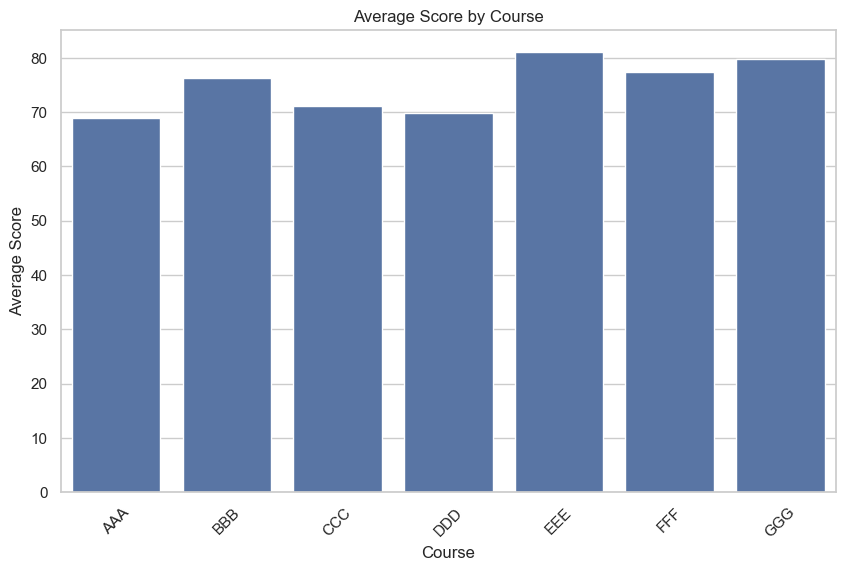

In [95]:
plt.figure(figsize=(10, 6))
avg_scores = merged_data.groupby('code_module')['score'].mean().reset_index()
sns.barplot(x='code_module', y='score', data=avg_scores)
plt.title('Average Score by Course')
plt.xlabel('Course')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.show()


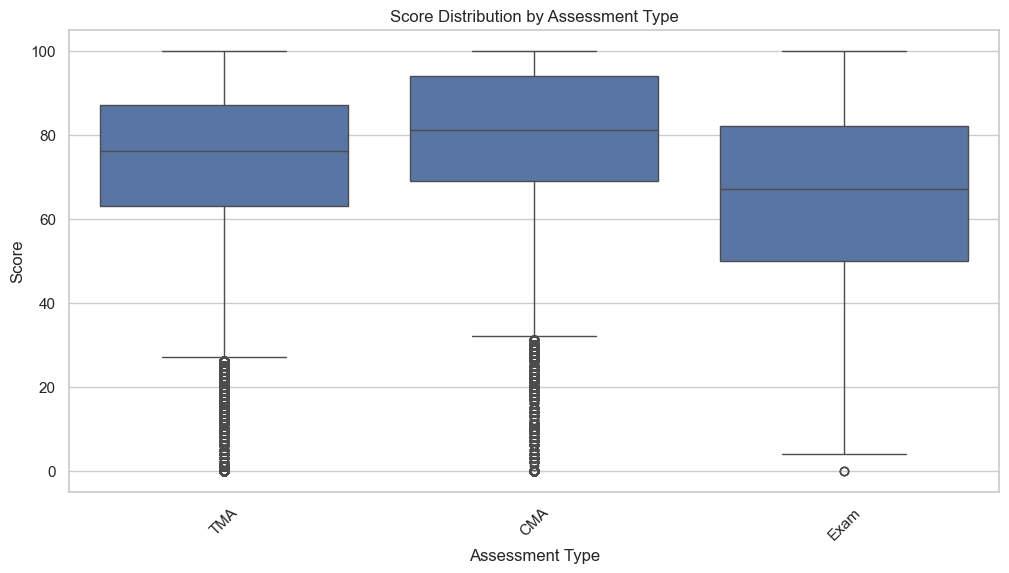

In [101]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='assessment_type', y='score', data=merged_data)
plt.title('Score Distribution by Assessment Type')
plt.xlabel('Assessment Type')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()

  Assessment Type  Average Score
0             CMA      78.886572
1            Exam      65.818940
2             TMA      72.604548


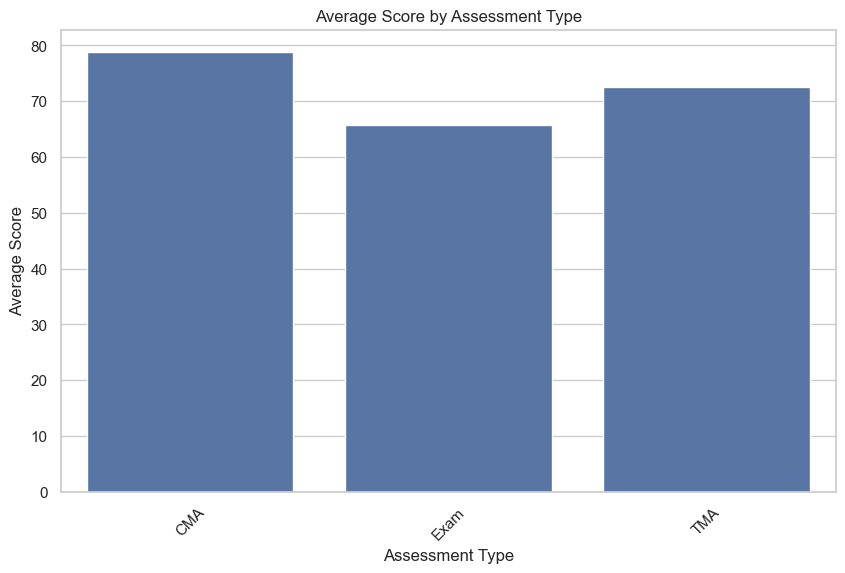

In [105]:
average_scores = merged_data.groupby('assessment_type')['score'].mean().reset_index()
average_scores.columns = ['Assessment Type', 'Average Score']

# Display the average scores
print(average_scores)

# Optional: Visualization
plt.figure(figsize=(10, 6))
sns.barplot(x='Assessment Type', y='Average Score', data=average_scores)
plt.title('Average Score by Assessment Type')
plt.xlabel('Assessment Type')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.show()


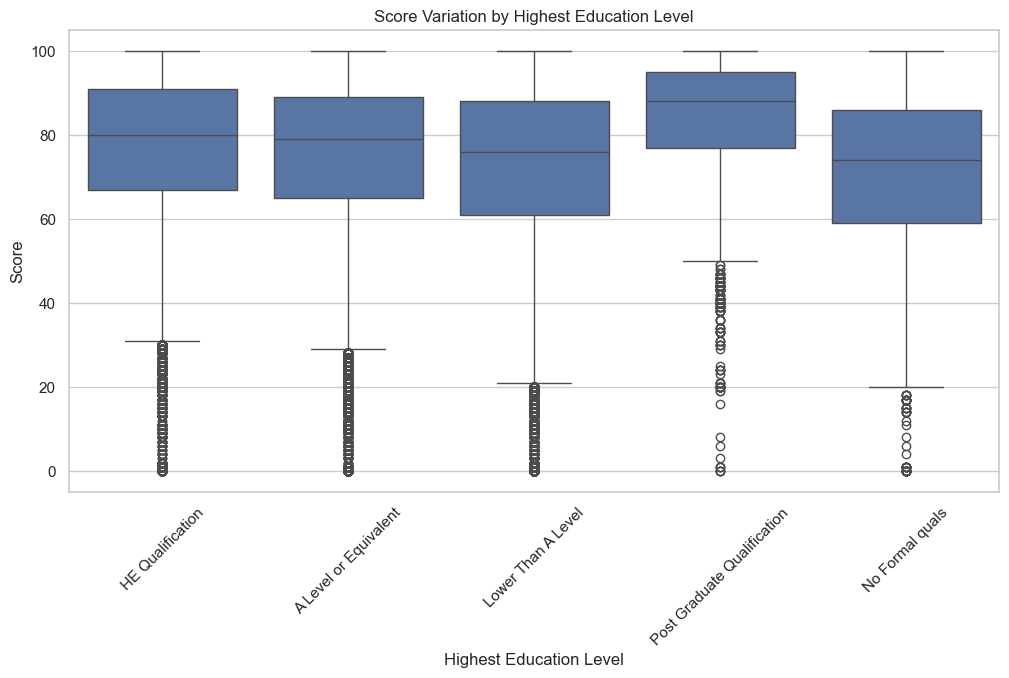

In [142]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='highest_education', y='score', data=merged_data)
plt.title('Score Variation by Highest Education Level')
plt.xlabel('Highest Education Level')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()


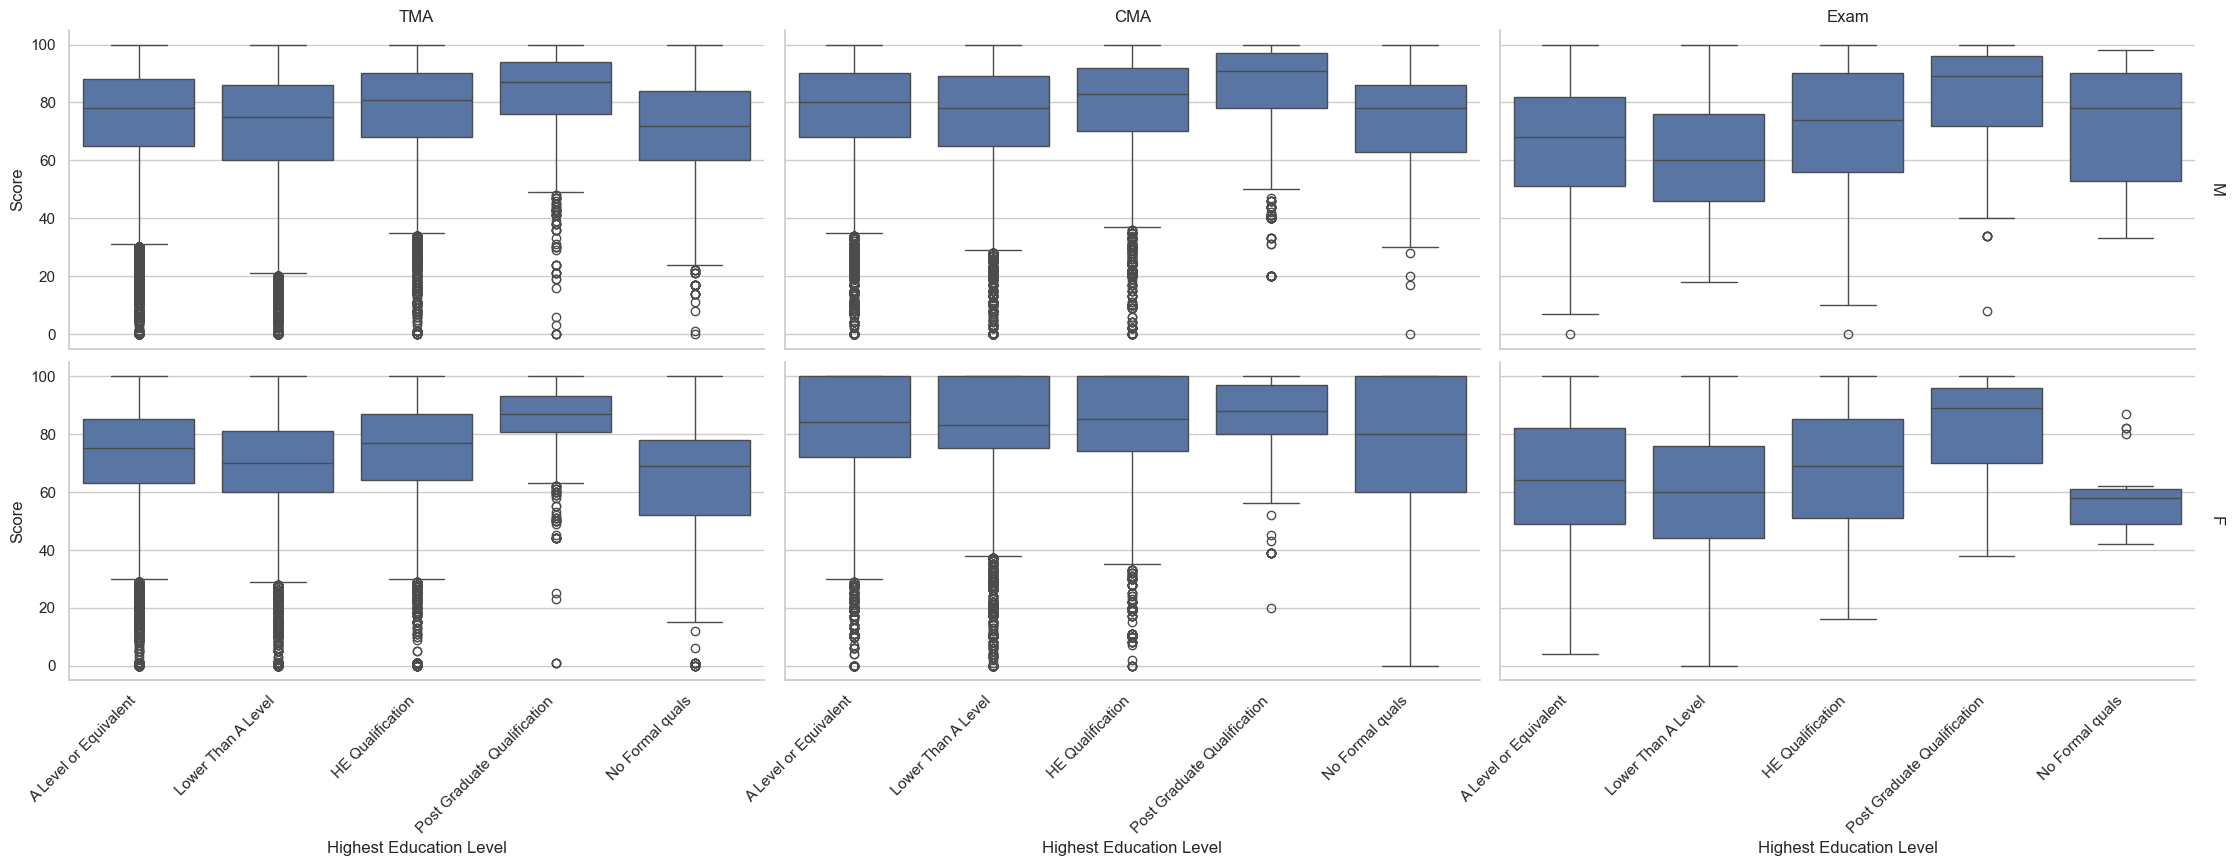

In [160]:
# Define the order for highest education and assessment type
highest_education_order = merged_data['highest_education'].value_counts().index.tolist()
assessment_type_order = merged_data['assessment_type'].unique()

# Create the FacetGrid
g = sns.FacetGrid(merged_data, col='assessment_type', row='gender', margin_titles=True, height=5, aspect=1.5)
g.map(sns.boxplot, 'highest_education', 'score', order=highest_education_order)

# Set axis labels and titles
g.set_axis_labels('Highest Education Level', 'Score')
g.set_titles(col_template="{col_name}", row_template="{row_name}")

# Rotate x-axis labels and set ticks properly
for ax in g.axes.flat:
    ax.set_xticks(range(len(highest_education_order)))  # Ensure ticks are set
    ax.set_xticklabels(highest_education_order, rotation=45, ha='right')

# Adjust the layout to prevent text collision
plt.subplots_adjust(top=0.9, bottom=0.25)  # Adjust bottom spacing as necessary
plt.show()

## 3. Relationships Between Variables
Relationship Between Studied Credits and Scores
Scores vs. Number of Assessments Completed
Scores by Studied Credits and Age Band

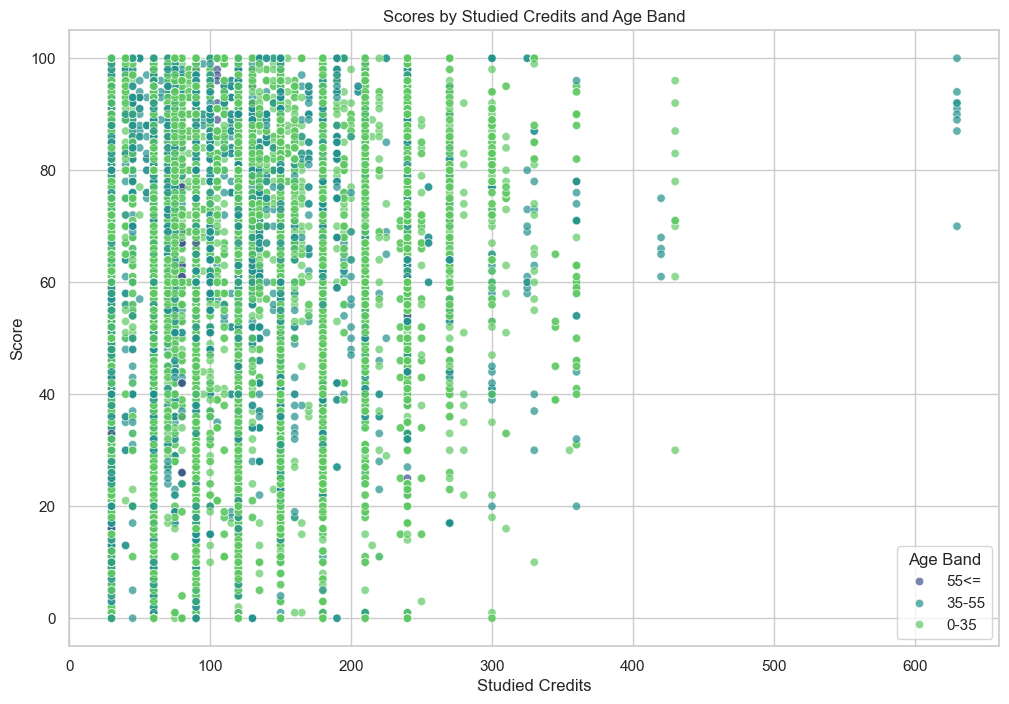

In [119]:
# Make sure 'studied_credits' and 'age' are numeric
plt.figure(figsize=(12, 8))
sns.scatterplot(x='studied_credits', y='score', hue='age_band', data=merged_data, palette='viridis', alpha=0.7)
plt.title('Scores by Studied Credits and Age Band')
plt.xlabel('Studied Credits')
plt.ylabel('Score')
plt.legend(title='Age Band')
plt.show()


Index(['id_assessment', 'id_student', 'date_submitted', 'is_banked', 'score'], dtype='object')


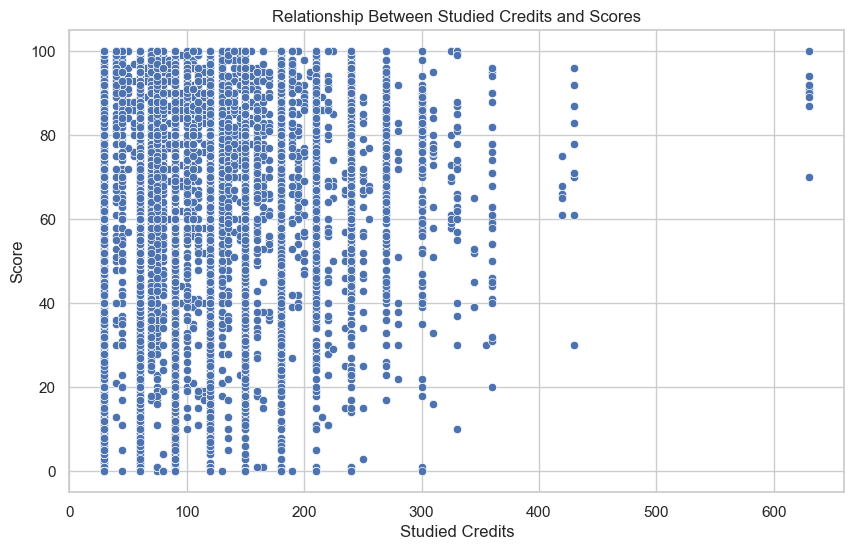

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your student_info DataFrame (adjust the path as necessary)
# student_info = pd.read_csv('path_to_student_info.csv')

# Check the columns in student_assessment
print(student_assessment.columns)

# Merge DataFrames to include studied_credits
merged_data = student_assessment.merge(student_info[['id_student', 'studied_credits']], on='id_student', how='left')

# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='studied_credits', y='score', data=merged_data)
plt.title('Relationship Between Studied Credits and Scores')
plt.xlabel('Studied Credits')
plt.ylabel('Score')
plt.show()


## 4. Trends Over Time
Trends in Average Scores Over Time

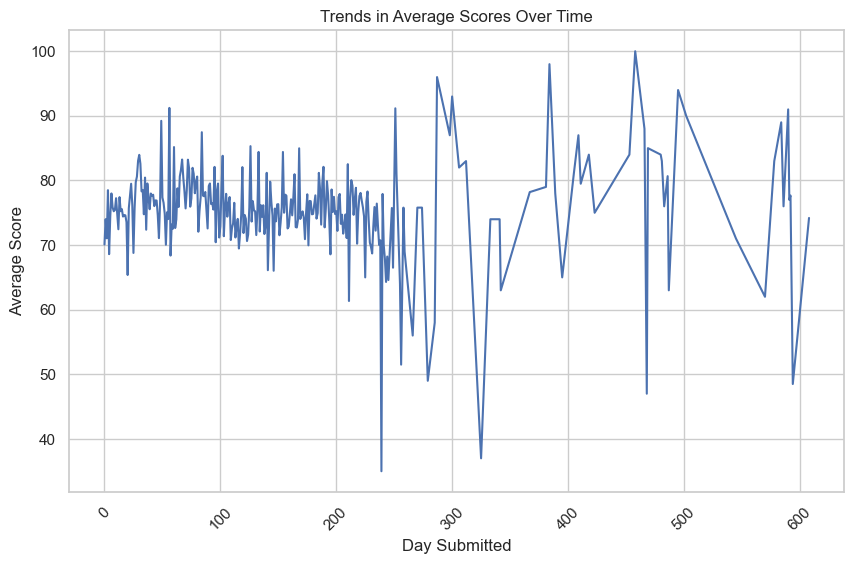

In [127]:
score_trend = student_assessment.groupby('date_submitted')['score'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(x='date_submitted', y='score', data=score_trend)
plt.title('Trends in Average Scores Over Time')
plt.xlabel('Day Submitted')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.show()


## 5. Correlation Analysis
Correlation Matrix of Numeric Features

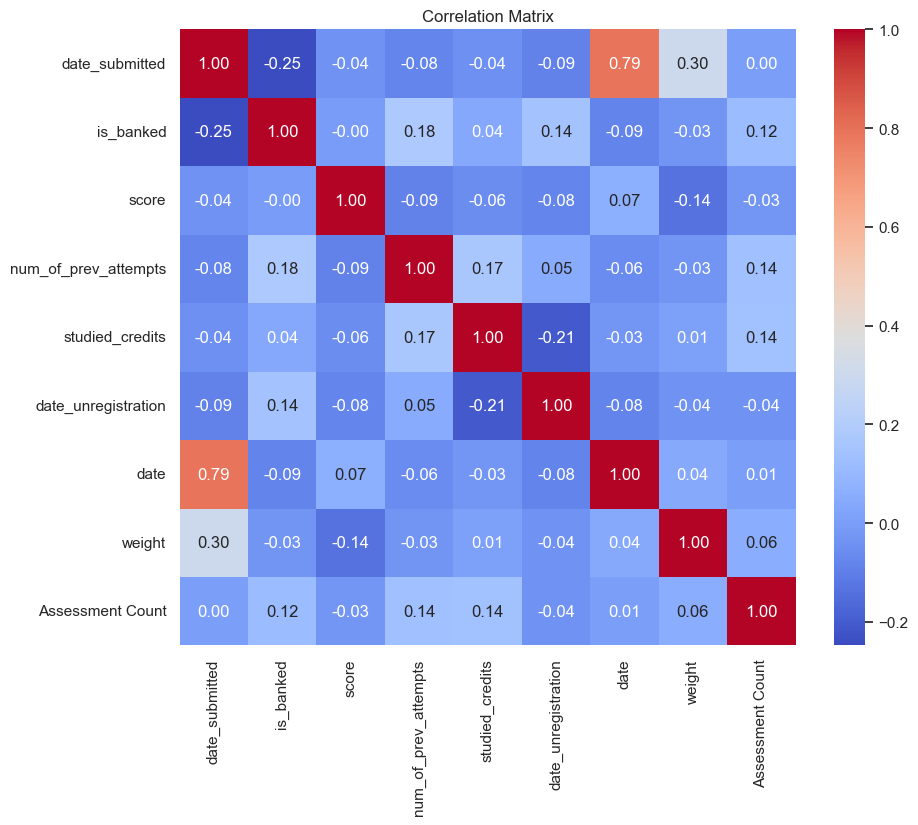

In [137]:
numeric_columns = [col for col in numeric_columns if 'id_' not in col]  # Exclude any column with 'id_'
numeric_data = merged_data[numeric_columns]

# Step 3: Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Step 4: Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

## 6. Visualization of Gender Distribution
Score Variation by Gender

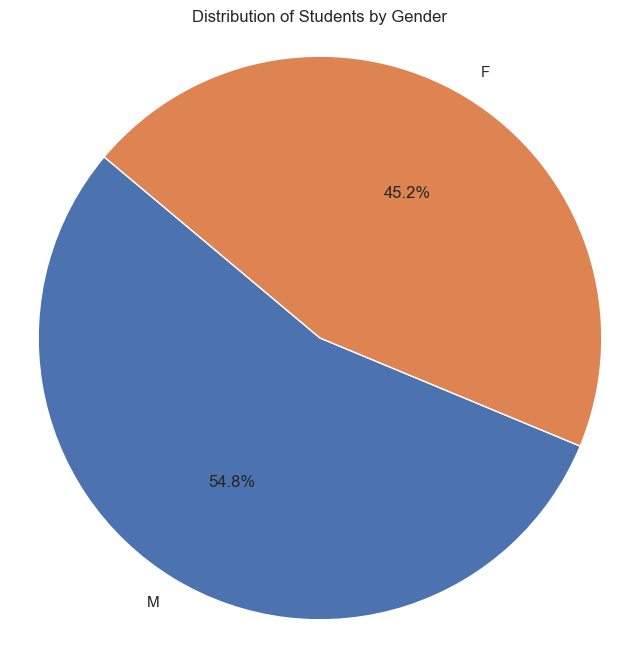

In [56]:
gender_distribution = student_info['gender'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(gender_distribution, labels=gender_distribution.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Students by Gender')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is a circle.
plt.show()


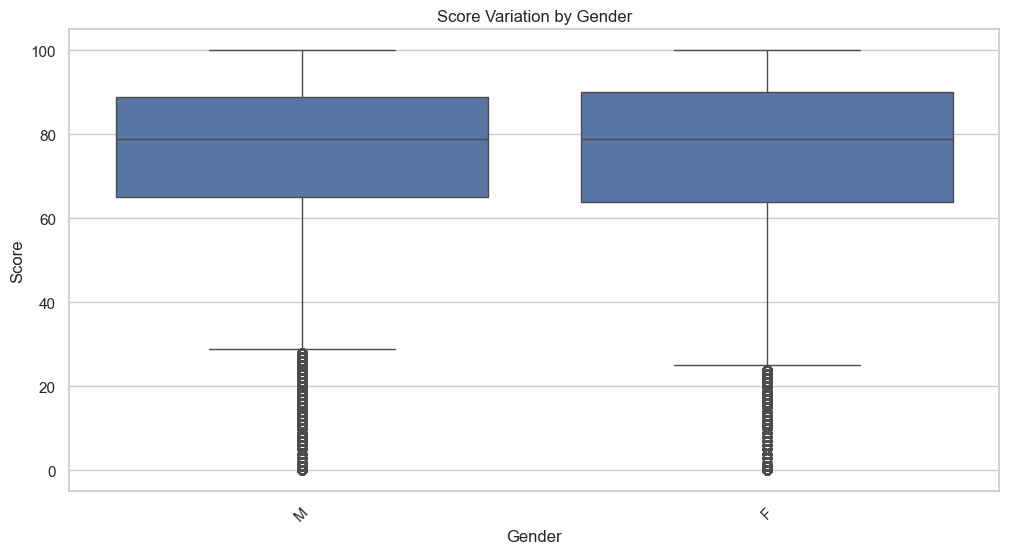

In [107]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='gender', y='score', data=merged_data)
plt.title('Score Variation by Gender')
plt.xlabel('Gender')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.show()


## 7. Comprehensive Analysis by Education and Assessment Type
Average Score by Highest Education and Assessment Type
Score Distribution by Assessment Type and GenderScore Distribution by Assessment Type and Gender

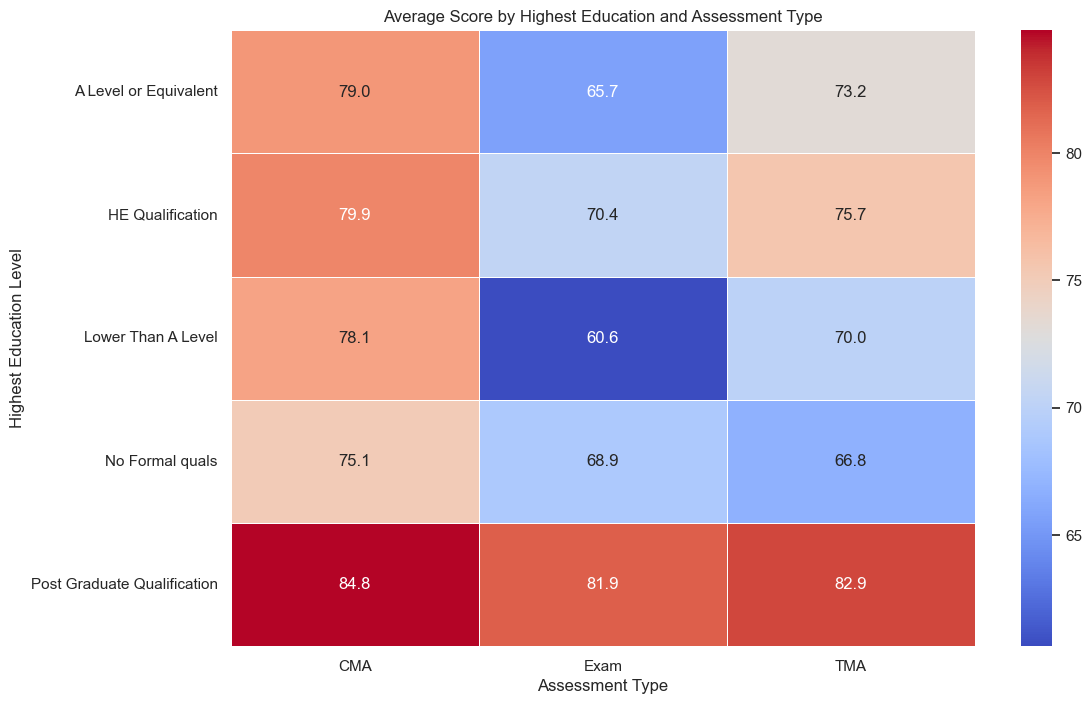

In [125]:
# Create a pivot table for the heatmap
pivot_table = merged_data.pivot_table(values='score', index='highest_education', columns='assessment_type', aggfunc='mean')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt='.1f', cmap='coolwarm', linewidths=0.5)
plt.title('Average Score by Highest Education and Assessment Type')
plt.xlabel('Assessment Type')
plt.ylabel('Highest Education Level')
plt.show()


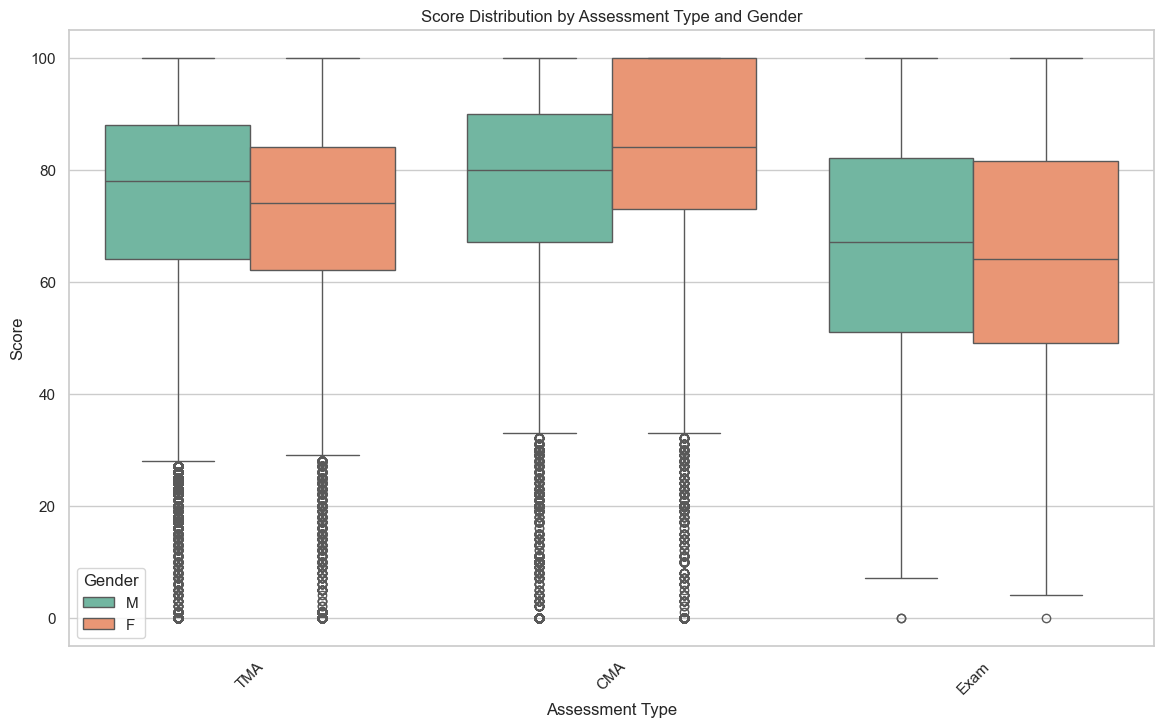

In [117]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='assessment_type', y='score', hue='gender', data=merged_data, palette='Set2')
plt.title('Score Distribution by Assessment Type and Gender')
plt.xlabel('Assessment Type')
plt.ylabel('Score')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()
